In [49]:
!pip install tensorflow

In [203]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import pandas as pd
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
import networkx as nx
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import math
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data preparation

## Load and train/test split

In [190]:
with zipfile.ZipFile('superconductivty+data.zip', 'r') as z:    
    with z.open('train.csv') as f:
        df = pd.read_csv(f)

target_column = 'critical_temp'
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1337
)

X_train

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
10403                   2         71.082750             64.369000   
4292                    5         69.171250             49.067610   
20914                   6         55.940606             67.060571   
1678                    5        103.006010             56.062921   
11344                   2         90.670800             97.420457   
...                   ...               ...                   ...   
19111                   3         45.902533             46.228560   
19623                   5         79.575000             80.535453   
9448                    6        120.375212            115.424705   
860                     4         92.505350             60.961000   
3223                    5        106.166810             57.390674   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
10403          68.169549              61.861084             0.652449   
4292           54.872765              34.230190             1.419173   
20914          41.977919              50.661140             1.525782   
1678           79.085090              36.394169             1.435319   
11344          89.292534              96.266629             0.677985   
...                  ...                    ...                  ...   
19111          30.737683              31.167948             0.847772   
19623          62.575093              63.845011             1.427934   
9448           90.122861              86.138031             1.588258   
860            68.030395              36.899835             1.172035   
3223           80.614435              36.904933             1.426911   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
10403                 0.691623           40.28250               3.553000   
4292                  1.322714          121.32760              17.127567   
20914                 1.291521          122.90607              34.488887   
1678                  1.464096          141.25060              17.333563   
11344                 0.526566           31.49840              54.608114   
...                        ...                ...                    ...   
19111                 0.846006           67.98060              22.706473   
19623                 1.257422          121.32760              34.030613   
9448                  1.437592          192.98100              53.061540   
860                   0.995372          134.36060              36.735514   
3223                  1.461148          157.05460              18.056077   

       std_atomic_mass  ...  mean_Valence  wtd_mean_Valence  gmean_Valence  \
10403        20.141250  ...      4.500000          4.666667       4.472136   
4292         41.809011  ...      2.200000          2.066667       2.168944   
20914        42.479064  ...      3.166667          3.237500       2.768229   
1678         54.192468  ...      2.600000          2.103846       2.491462   
11344        15.749200  ...      4.500000          4.285714       4.472136   
...                ...  ...           ...               ...            ...   
19111        28.629588  ...      3.000000          3.013333       2.466212   
19623        45.130424  ...      3.600000          3.666667       3.314454   
9448         71.797826  ...      3.000000          3.000000       2.798166   
860          55.465617  ...      2.750000          2.307143       2.632148   
3223         57.616794  ...      2.600000          2.101010       2.491462   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
10403           4.641589         0.686962             0.598270              1   
4292            2.054799         1.594167             1.206764              1   
20914           3.053499         1.677473             1.607927              4   
1678            2.079406         1.564957             1.297168              2   
11344           4.263326         0.686962             0.63

## Scaling

In [191]:
scaler = StandardScaler()
X_train_array = scaler.fit_transform(X_train)
X_train = pd.DataFrame(
    X_train_array, 
    columns=X_train.columns, 
    index=X_train.index
)
X_train

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
10403           -1.467559         -0.554864             -0.259582   
4292             0.615251         -0.619294             -0.716099   
20914            1.309522         -1.065256             -0.179279   
1678             0.615251          0.521165             -0.507394   
11344           -1.467559          0.105386              0.726510   
...                   ...               ...                   ...   
19111           -0.773289         -1.403607             -0.800803   
19623            0.615251         -0.268618              0.222745   
9448             1.309522          1.106625              1.263668   
860             -0.079019          0.167222             -0.361260   
3223             0.615251          0.627706             -0.467780   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
10403          -0.100466               0.088600            -1.406301   
4292           -0.529134              -0.665227             0.696259   
20914          -0.944843              -0.216957             0.988608   
1678            0.251434              -0.606189             0.740534   
11344           0.580506               1.027252            -1.336273   
...                  ...                    ...                  ...   
19111          -1.307211              -0.748771            -0.870673   
19623          -0.280823               0.142725             0.720283   
9448            0.607275               0.750924             1.159933   
860            -0.104952              -0.592393             0.018542   
3223            0.300738              -0.592254             0.717479   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
10403                -0.928892          -1.379743              -1.104772   
4292                  0.646852           0.104135              -0.599392   
20914                 0.568967           0.133035               0.046969   
1678                  0.999861           0.468910              -0.591723   
11344                -1.341016          -1.540574               0.796006   
...                        ...                ...                    ...   
19111                -0.543420          -0.872611              -0.391690   
19623                 0.483826           0.104135               0.029907   
9448                  0.933686           1.416057               0.738427   
860                  -0.170475           0.342760               0.130611   
3223                  0.992500           0.758270              -0.564824   

       std_atomic_mass  ...  mean_Valence  wtd_mean_Valence  gmean_Valence  \
10403        -1.212712  ...      1.234035          1.259373       1.339393   
4292         -0.129393  ...     -0.954871         -0.912897      -0.848021   
20914        -0.095893  ...     -0.034896          0.065321      -0.278860   
1678          0.489740  ...     -0.574192         -0.881834      -0.541715   
11344        -1.432300  ...      1.234035          0.941092       1.339393   
...                ...  ...           ...               ...            ...   
19111        -0.788322  ...     -0.193512         -0.121968      -0.565696   
19623         0.036667  ...      0.377507          0.423884       0.239906   
9448          1.369951  ...     -0.193512         -0.133108      -0.250428   
860           0.553393  ...     -0.431437         -0.711982      -0.408101   
3223          0.660945  ...     -0.574192         -0.884204      -0.541715   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
10403           1.337484        -1.545968            -1.198362      -0.835211   
4292           -0.853142         0.759326             0.404537      -0.835211   
20914          -0.007392         0.971016             1.461280       1.579293   
1678           -0.832304         0.685102             0.642677      -0.030376   
11344           1.017152        -1.545968            -1.09

In [192]:
X_test_array = scaler.transform(X_test)
X_test = pd.DataFrame(
    X_test_array, 
    columns=X_test.columns, 
    index=X_test.index
)
X_test

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
11114           -0.773289          1.106651              1.493228   
3605             2.003792          0.658408             -0.521874   
6410             0.615251         -0.175913             -0.653993   
18710           -0.773289          0.523609              1.128243   
4599             0.615251         -0.619294             -0.651814   
...                   ...               ...                   ...   
11368           -1.467559          1.934505              1.367993   
9535             2.003792          0.799556             -0.472313   
12771           -1.467559          0.423719              0.816862   
296              0.615251         -0.707582              0.226856   
14310            0.615251         -1.416982             -0.831932   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
11114           1.578803               1.757565            -0.185495   
3605            0.265351              -0.613535             1.512633   
6410           -0.388278              -0.674578             0.419915   
18710           0.999599               1.408168            -0.203656   
4599           -0.529134              -0.644371             0.696259   
...                  ...                    ...                  ...   
11368           2.062925               1.459406            -1.475399   
9535            0.570596              -0.616768             1.710808   
12771           0.805395               1.036302            -1.399374   
296            -0.663729               0.228489             0.598944   
14310          -1.324521              -0.847495             0.374067   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
11114                -0.770007          -1.883258               1.086236   
3605                  1.748866           1.331887              -0.655052   
6410                  1.097420           1.331887              -0.760085   
18710                -0.614151          -1.548051               1.146354   
4599                  0.613207           0.104135              -0.454133   
...                        ...                ...                    ...   
11368                -0.962144          -0.212019              -0.476139   
9535                  1.980869           1.383459              -0.802072   
12771                -1.028442          -1.110825              -0.168515   
296                   0.197396           0.104135               0.202189   
14310                 0.300735          -0.574125              -0.452587   

       std_atomic_mass  ...  mean_Valence  wtd_mean_Valence  gmean_Valence  \
11114        -1.952249  ...      1.075419          1.529556       1.043107   
3605          1.274233  ...     -1.009254         -0.942487      -0.895199   
6410          1.055962  ...     -0.954871         -0.903451      -0.848021   
18710        -1.585099  ...      0.758186          0.785929       0.543618   
4599         -0.129393  ...     -0.954871         -0.910171      -0.848021   
...                ...  ...           ...               ...            ...   
11368         0.381628  ...      1.709884          1.537869       1.840722   
9535          0.683633  ...     -0.465426         -0.770168      -0.454383   
12771        -0.845548  ...      1.709884          1.548017       1.744780   
296          -0.024490  ...     -0.764531         -0.831338      -0.674016   
14310        -0.508989  ...      0.377507          0.075764       0.063903   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
11114           1.541849        -0.603365            -0.893172       0.774458   
3605           -0.877952         1.622391             1.112107      -0.835211   
6410           -0.845147         0.759326             0.787661      -0.835211   
18710           0.717533        -0.721529            -0.562158       1.579293   
4599           -0.850838         0.759326             0.46

# Handling correlated features

## Cluster features

In [193]:
# Create adjacency matrix
corr_matrix = X_train.corr().abs()
high_corr = corr_matrix > 0.9
G = nx.from_pandas_adjacency(high_corr)

# Extract clusters
feature_clusters = [list(c) for c in nx.connected_components(G) if len(c) > 1]
feature_clusters

[['wtd_entropy_atomic_mass',
  'wtd_entropy_FusionHeat',
  'entropy_atomic_mass',
  'entropy_fie',
  'entropy_atomic_radius',
  'entropy_Density',
  'entropy_FusionHeat',
  'wtd_entropy_Valence',
  'number_of_elements',
  'wtd_entropy_atomic_radius',
  'entropy_ElectronAffinity',
  'entropy_Valence'],
 ['gmean_atomic_mass', 'mean_atomic_mass'],
 ['wtd_gmean_atomic_mass', 'wtd_mean_atomic_mass'],
 ['std_atomic_mass', 'wtd_std_atomic_mass', 'range_atomic_mass'],
 ['mean_fie', 'gmean_fie'],
 ['wtd_gmean_atomic_radius',
  'wtd_mean_atomic_radius',
  'wtd_gmean_fie',
  'wtd_mean_fie'],
 ['range_atomic_radius',
  'std_fie',
  'wtd_std_fie',
  'std_atomic_radius',
  'wtd_std_atomic_radius',
  'range_fie'],
 ['gmean_atomic_radius', 'mean_atomic_radius'],
 ['wtd_gmean_Density', 'gmean_Density', 'wtd_mean_Density'],
 ['std_Density', 'wtd_std_Density', 'range_Density'],
 ['std_ElectronAffinity', 'range_ElectronAffinity'],
 ['mean_FusionHeat',
  'wtd_gmean_FusionHeat',
  'wtd_mean_FusionHeat',
  '

## PCA-encode correlated features

In [194]:
pca_models = {}
for cluster in feature_clusters:
    pca = PCA(n_components=1)
    pca.fit(X_train[cluster])
    
    pca_name = f"PCA_{cluster[0]}"
    pca_models[pca_name] = {
        'model': pca,
        'features': cluster
    }

# Transform
for name, info in pca_models.items():
    X_train[name] = info['model'].transform(X_train[info['features']])

# Remove
for cluster in feature_clusters:
    X_train = X_train.drop(columns=cluster)

X_train

wtd_range_atomic_mass  wtd_entropy_fie  wtd_range_fie  \
10403              -1.104772        -0.865182      -1.200562   
4292               -0.599392        -0.084433       0.954198   
20914               0.046969         2.026553      -0.855360   
1678               -0.591723        -0.051170       0.938515   
11344               0.796006        -0.900306      -0.798581   
...                      ...              ...            ...   
19111              -0.391690         0.421501      -1.503698   
19623               0.029907         1.518835      -1.178474   
9448                0.738427         2.118214      -1.337656   
860                 0.130611        -0.424567       1.143300   
3223               -0.564824        -0.028447       0.919689   

       wtd_range_atomic_radius  mean_Density  wtd_entropy_Density  \
10403                -0.170898      0.065417            -0.659818   
4292                 -0.399284     -0.843719            -0.398269   
20914                -0.087931     -0.879629             0.995428   
1678                 -0.545620     -0.250650             0.463019   
11344                 1.057385      0.958084            -1.306678   
...                        ...           ...                  ...   
19111                -0.996648     -0.490998            -0.140628   
19623                 0.102631     -0.708035             0.869623   
9448                 -0.025526      0.123109             1.724442   
860                   0.219379     -0.129386            -0.109696   
3223                 -0.508734     -0.343310             0.366229   

       wtd_range_Density  mean_ElectronAffinity  wtd_mean_ElectronAffinity  \
10403          -0.416125              -1.068810                  -1.359610   
4292           -0.216039              -0.518749                   0.599557   
20914          -0.389144               1.381286                  -0.587099   
1678           -0.348578              -0.026826                   0.559471   
11344           1.664209              -0.345712                  -0.949448   
...                  ...                    ...                        ...   
19111          -0.169137              -0.878997                  -1.254846   
19623          -0.372503              -0.240863                  -0.909843   
9448           -0.125718              -0.082806                  -0.521205   
860            -0.399858               0.522005                   0.638121   
3223           -0.339969              -0.026826                   0.549509   

       gmean_ElectronAffinity  ...  PCA_range_atomic_radius  \
10403               -0.250905  ...                -4.040810   
4292                -0.782579  ...                 2.059755   
20914                0.821714  ...                 1.738814   
1678                 0.149520  ...                 2.390754   
11344                0.407168  ...                -2.992790   
...                       ...  ...                      ...   
19111               -0.367657  ...                -2.015781   
19623               -0.354534  ...                 1.503386   
9448                -0.098687  ...                 0.836383   
860                  0.950644  ...                 2.174609   
3223                 0.149520  ...                 2.351902   

       PCA_gmean_atomic_radius  PCA_wtd_gmean_Density  PCA_std_Density  \
10403                 2.452960               1.057130        -3.395005   
4292                  0.565824              -1.239206         0.082433   
20914                -3.346299              -0.971320        -0.300975   
1678                  1.415983              -1.171773         0.162381   
11344                -0.761866               2.571911        -0.599359   
...                        ...                    ...              ...   
19111                -0.457473              -0.212199        -0.394223   
19623                -1.039508              -0.833610        -1.048634   
9448                 -0.505123              -0.39

In [195]:
# Do the same on test data
for name, info in pca_models.items():
    X_test[name] = info['model'].transform(X_test[info['features']])

# Remove
for cluster in feature_clusters:
    X_test = X_test.drop(columns=cluster)

X_test

wtd_range_atomic_mass  wtd_entropy_fie  wtd_range_fie  \
11114               1.086236        -0.570579      -0.241930   
3605               -0.655052         0.603983       0.733550   
6410               -0.760085         0.198744       0.759982   
18710               1.146354        -0.232744      -0.466618   
4599               -0.454133        -0.045948       0.954028   
...                      ...              ...            ...   
11368              -0.476139        -0.926993      -0.924463   
9535               -0.802072         0.327484       1.052252   
12771              -0.168515        -0.711623      -1.865910   
296                 0.202189         1.281927      -0.854951   
14310              -0.452587         1.695699      -0.946773   

       wtd_range_atomic_radius  mean_Density  wtd_entropy_Density  \
11114                 0.469315      0.289179            -0.293399   
3605                 -0.674176     -0.040902             1.558141   
6410                 -0.840708     -0.391346             0.857629   
18710                 0.290084      0.466703            -0.133641   
4599                 -0.386788     -0.843719            -0.114864   
...                        ...           ...                  ...   
11368                 1.541046      2.719400            -0.543692   
9535                 -0.834993      0.032644             2.395120   
12771                -1.457072     -0.118720            -0.524884   
296                   0.529865     -0.763659             0.068087   
14310                -0.138464     -1.423141            -0.288550   

       wtd_range_Density  mean_ElectronAffinity  wtd_mean_ElectronAffinity  \
11114           0.208402               1.207140                   1.756394   
3605           -0.508310              -1.177274                   0.129362   
6410           -0.624831              -0.658452                   0.147333   
18710           0.595080              -0.050688                   0.037855   
4599           -0.339969              -0.518749                   0.493722   
...                  ...                    ...                        ...   
11368          -0.539950               2.857611                   0.902161   
9535           -0.739102              -0.662945                   0.354904   
12771          -0.982416               2.863034                   1.981396   
296             0.302842              -0.228570                  -0.426845   
14310          -0.529630               2.923051                   0.571644   

       gmean_ElectronAffinity  ...  PCA_range_atomic_radius  \
11114                1.083494  ...                -3.097910   
3605                -1.340922  ...                 1.875284   
6410                -1.026476  ...                 1.503071   
18710               -0.395428  ...                -2.757205   
4599                -0.782579  ...                 2.145854   
...                       ...  ...                      ...   
11368                2.949809  ...                -3.320742   
9535                -0.882315  ...                 1.491002   
12771                3.356081  ...                -4.310292   
296                 -0.100987  ...                 1.724637   
14310                0.741278  ...                 1.604902   

       PCA_gmean_atomic_radius  PCA_wtd_gmean_Density  PCA_std_Density  \
11114                -0.708632               1.321085        -3.072602   
3605                  0.684779              -1.112872         1.524574   
6410                 -0.476366              -1.273298         1.120399   
18710                 1.759744               1.393602         0.222413   
4599                  0.565824              -1.271743         0.027798   
...                        ...                    ...              ...   
11368                 2.298823               3.567677         1.434536   
9535                  0.322920              -1.117272         0.584464   
12771                -1.850180               0.82

## Re-scale

In [196]:
X_train_array = scaler.fit_transform(X_train)
scaler2 = MinMaxScaler(feature_range=(0, 1))
X_train_array = scaler2.fit_transform(X_train_array)
X_train = pd.DataFrame(
    X_train_array, 
    columns=X_train.columns, 
    index=X_train.index
)
X_train

wtd_range_atomic_mass  wtd_entropy_fie  wtd_range_fie  \
10403               0.017282         0.313336       0.170547   
4292                0.083309         0.441208       0.556287   
20914               0.167756         0.786950       0.232344   
1678                0.084311         0.446656       0.553480   
11344               0.265617         0.307583       0.242509   
...                      ...              ...            ...   
19111               0.110445         0.524071       0.116280   
19623               0.165527         0.703795       0.174501   
9448                0.258094         0.801962       0.146005   
860                 0.178683         0.385501       0.590140   
3223                0.087826         0.450378       0.550109   

       wtd_range_atomic_radius  mean_Density  wtd_entropy_Density  \
10403                 0.217917      0.279304             0.379209   
4292                  0.179654      0.163678             0.428157   
20914                 0.231818      0.159111             0.688984   
1678                  0.155137      0.239106             0.589345   
11344                 0.423703      0.392835             0.258150   
...                        ...           ...                  ...   
19111                 0.079572      0.208538             0.476374   
19623                 0.263744      0.180935             0.665440   
9448                  0.242273      0.286641             0.825418   
860                   0.283304      0.254528             0.482163   
3223                  0.161316      0.227321             0.571231   

       wtd_range_Density  mean_ElectronAffinity  wtd_mean_ElectronAffinity  \
10403           0.084826               0.141251                   0.146129   
4292            0.106470               0.188121                   0.340510   
20914           0.087745               0.350021                   0.222774   
1678            0.092133               0.230037                   0.336533   
11344           0.309865               0.202865                   0.186823   
...                  ...                    ...                        ...   
19111           0.111544               0.157425                   0.156523   
19623           0.089545               0.211799                   0.190753   
9448            0.116241               0.225267                   0.229312   
860             0.086586               0.276802                   0.344336   
3223            0.093064               0.230037                   0.335544   

       gmean_ElectronAffinity  ...  PCA_range_atomic_radius  \
10403                0.140515  ...                 0.092330   
4292                 0.092891  ...                 0.766545   
20914                0.236593  ...                 0.731075   
1678                 0.176382  ...                 0.803126   
11344                0.199461  ...                 0.208154   
...                       ...  ...                      ...   
19111                0.130057  ...                 0.316130   
19623                0.131233  ...                 0.705057   
9448                 0.154150  ...                 0.631342   
860                  0.248142  ...                 0.779238   
3223                 0.176382  ...                 0.798832   

       PCA_gmean_atomic_radius  PCA_wtd_gmean_Density  PCA_std_Density  \
10403                 0.560447               0.277219         0.018934   
4292                  0.447979               0.063517         0.359829   
20914                 0.214828               0.088447         0.322243   
1678                  0.498646               0.069792         0.367666   
11344                 0.368853               0.418187         0.292992   
...                        ...                    ...              ...   
19111                 0.386994               0.159092         0.313102   
19623                 0.352306               0.101263         0.248950   
9448                  0.384154               0.14

In [197]:
X_test_array = scaler.transform(X_test)
X_test_array = scaler2.transform(X_test_array)
X_test = pd.DataFrame(
    X_test_array, 
    columns=X_test.columns, 
    index=X_test.index
)
X_test

wtd_range_atomic_mass  wtd_entropy_fie  wtd_range_fie  \
11114               0.303535         0.361586       0.342159   
3605                0.076037         0.553959       0.516787   
6410                0.062315         0.487588       0.521519   
18710               0.311389         0.416918       0.301936   
4599                0.102287         0.447512       0.556257   
...                      ...              ...            ...   
11368               0.099412         0.303212       0.219974   
9535                0.056829         0.508673       0.573840   
12771               0.139603         0.338486       0.051438   
296                 0.188035         0.664994       0.232417   
14310               0.102489         0.732762       0.215980   

       wtd_range_atomic_radius  mean_Density  wtd_entropy_Density  \
11114                 0.325178      0.307762             0.447783   
3605                  0.133599      0.265782             0.794295   
6410                  0.105698      0.221212             0.663196   
18710                 0.295150      0.330340             0.477682   
4599                  0.181747      0.163678             0.481196   
...                        ...           ...                  ...   
11368                 0.504735      0.616842             0.400942   
9535                  0.106655      0.275136             0.950933   
12771                 0.002433      0.255885             0.404461   
296                   0.335323      0.173860             0.515435   
14310                 0.223351      0.089986             0.448691   

       wtd_range_Density  mean_ElectronAffinity  wtd_mean_ElectronAffinity  \
11114           0.152384               0.335182                   0.455287   
3605            0.074854               0.132009                   0.293859   
6410            0.062249               0.176217                   0.295642   
18710           0.194213               0.228004                   0.284780   
4599            0.093064               0.188121                   0.330009   
...                  ...                    ...                        ...   
11368           0.071431               0.475816                   0.370533   
9535            0.049888               0.175834                   0.316236   
12771           0.023568               0.476278                   0.477611   
296             0.162600               0.212847                   0.238674   
14310           0.072548               0.481392                   0.337740   

       gmean_ElectronAffinity  ...  PCA_range_atomic_radius  \
11114                0.260042  ...                 0.196536   
3605                 0.042878  ...                 0.746158   
6410                 0.071044  ...                 0.705022   
18710                0.127569  ...                 0.234190   
4599                 0.092891  ...                 0.776060   
...                       ...  ...                      ...   
11368                0.427214  ...                 0.171910   
9535                 0.083957  ...                 0.703688   
12771                0.463606  ...                 0.062548   
296                  0.153944  ...                 0.729509   
14310                0.229388  ...                 0.716276   

       PCA_gmean_atomic_radius  PCA_wtd_gmean_Density  PCA_std_Density  \
11114                 0.372025               0.301783         0.050539   
3605                  0.455068               0.075274         0.501202   
6410                  0.385868               0.060344         0.461581   
18710                 0.519133               0.308531         0.373551   
4599                  0.447979               0.060489         0.354473   
...                        ...                    ...              ...   
11368                 0.551261               0.510855         0.492376   
9535                  0.433503               0.074864         0.409043   
12771                 0.303992               0.25

# Arrange features in a 2D place using MDS

In [125]:
dissimilarities = 1 - abs(X_train.corr())
dissimilarities

wtd_range_atomic_mass  wtd_entropy_fie  \
wtd_range_atomic_mass                         0.000000         0.769566   
wtd_entropy_fie                               0.769566         0.000000   
wtd_range_fie                                 0.885949         0.717147   
wtd_range_atomic_radius                       0.312981         0.677074   
mean_Density                                  0.493416         0.701485   
wtd_entropy_Density                           0.622663         0.237460   
wtd_range_Density                             0.177145         0.748927   
mean_ElectronAffinity                         0.920602         0.945592   
wtd_mean_ElectronAffinity                     0.887512         0.999583   
gmean_ElectronAffinity                        0.814231         0.833274   
wtd_gmean_ElectronAffinity                    0.976576         0.762343   
wtd_entropy_ElectronAffinity                  0.849947         0.138941   
wtd_range_ElectronAffinity                    0.950214         0.876203   
wtd_std_ElectronAffinity                      0.736278         0.447618   
wtd_range_FusionHeat                          0.883355         0.721324   
mean_ThermalConductivity                      0.871099         0.965606   
wtd_mean_ThermalConductivity                  0.944013         0.781215   
gmean_ThermalConductivity                     0.756957         0.644708   
wtd_gmean_ThermalConductivity                 0.712985         0.729288   
entropy_ThermalConductivity                   0.980365         0.514391   
wtd_entropy_ThermalConductivity               0.990889         0.538353   
wtd_range_ThermalConductivity                 0.935863         0.795184   
wtd_range_Valence                             0.404414         0.544992   
wtd_std_Valence                               0.903400         0.672952   
PCA_wtd_entropy_atomic_mass                   0.650878         0.238191   
PCA_gmean_atomic_mass                         0.541735         0.772616   
PCA_wtd_gmean_atomic_mass                     0.301686         0.818954   
PCA_std_atomic_mass                           0.930481         0.485469   
PCA_mean_fie                                  0.892945         0.720244   
PCA_wtd_gmean_atomic_radius                   0.537897         0.920509   
PCA_range_atomic_radius                       0.571089         0.502694   
PCA_gmean_atomic_radius                       0.791799         0.716650   
PCA_wtd_gmean_Density                         0.407171         0.626054   
PCA_std_Density                               0.948571         0.667718   
PCA_std_ElectronAffinity                      0.811397         0.474258   
PCA_mean_FusionHeat                           0.855038         0.717647   
PCA_std_FusionHeat                            0.896364         0.894784   
PCA_range_ThermalConductivity                 0.674042         0.649373   
PCA_wtd_gmean_Valence                         0.566945         0.633466   
PCA_std_Valence                               0.958213         0.687323   

                                 wtd_range_fie  wtd_range_atomic_radius  \
wtd_range_atomic_mass                 0.885949                 0.312981   
wtd_entropy_fie                       0.717147                 0.677074   
wtd_range_fie                         0.000000                 0.916222   
wtd_range_atomic_radius               0.916222                 0.000000   
mean_Density                          0.747617                 0.644072   
wtd_entropy_Density                   0.964165                 0.576266   
wtd_range_Density                     0.892860                 0.357490   
mean_ElectronAffinity                 0.892476                 0.973696   
wtd_mean_ElectronAffinity             0.602933                 0.695441   
gmean_ElectronAffinity                0.811059                 0.886886   
wtd_gmean_ElectronAffinity            0.646780                 0.865519   
wtd_entropy_ElectronAffinity          0.792446           

In [126]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(dissimilarities)

# Scale from zero to one - leave 5% slack
coords = MinMaxScaler(feature_range=(0.05, 0.95)).fit_transform(coords)

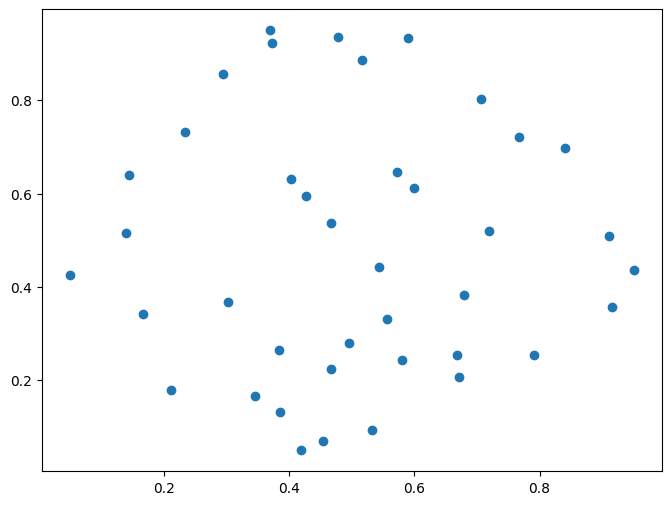

In [127]:
plt.figure(figsize=(8, 6))
plt.scatter(coords[:, 0], coords[:, 1])
plt.show()

# Convert to image

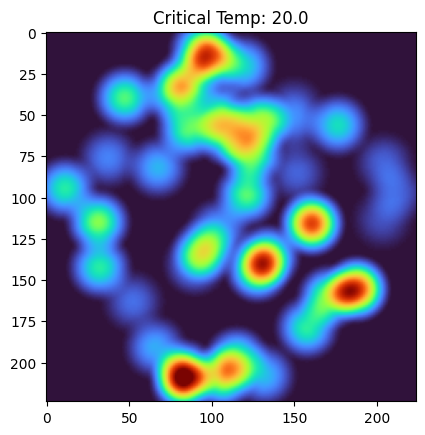

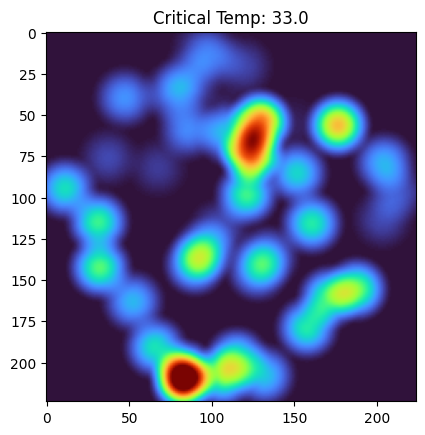

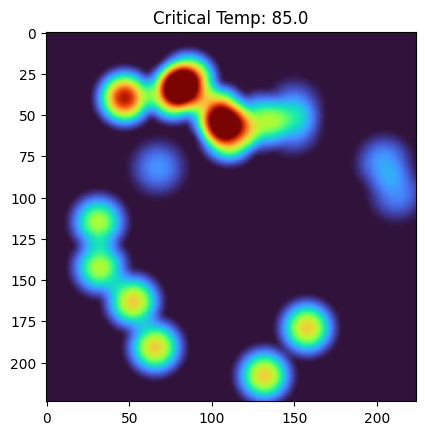

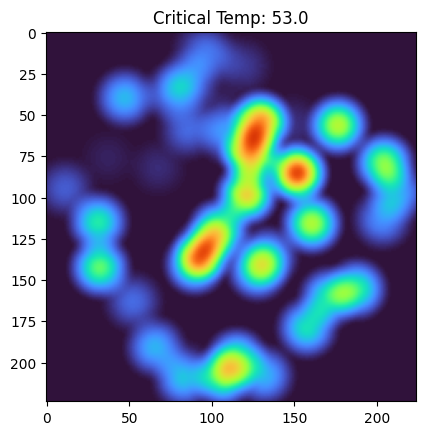

In [159]:
def fade_vec(d, radius):
    end = np.pi
    scaled = np.clip((d / radius) * end, 0, end)
    return (np.cos(scaled) + 1) / 2

def to_image(row, coords):
    grid = np.linspace(0, 1, 224)
    xn, yn = np.meshgrid(grid, grid)

    # Extract data
    row_values = row.values
    cx = coords[:, 0]
    cy = coords[:, 1]

    # Compute distances
    dx = xn[None, :, :] - cx[:, None, None]
    dy = yn[None, :, :] - cy[:, None, None]
    distances = np.sqrt(dx**2 + dy**2)

    intensities = np.sum(fade_vec(distances, 0.1) * row_values[:, None, None], axis=0)
    intensities = np.clip(intensities, 0, 1)

    # Colormap
    cmap = plt.get_cmap('turbo')
    result = cmap(intensities)[:, :, :3]

    return result

def showcase(row_num):
    image = to_image(X_train.iloc[row_num], coords)
    
    plt.imshow(image)
    plt.title(f'Critical Temp: {y_train[row_num]}')
    plt.show()

showcase(27)
showcase(7)
showcase(500)
showcase(223)

# Prepare pre-trained CNN

In [161]:
# Use ResNet50 without its classification head. We will replace that with a regression layer.
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(), 
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2), 
    layers.Dense(1, activation='linear') # Single float output
])

model.compile(
    optimizer='adam', 
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## Pack CNN inputs

In [163]:
N = len(X_train)
X_images = np.zeros((N, 224, 224, 3), dtype=np.float32)

X_train = X_train.reset_index(drop=True)


for i in range(N):
    X_images[i] = to_image(X_train.iloc[i], coords)
    
    if i % 100 == 0:
        print(f"Processed {i}/{N} images...")

Processed 0/17010 images...
Processed 100/17010 images...
Processed 200/17010 images...
Processed 300/17010 images...
Processed 400/17010 images...
Processed 500/17010 images...
Processed 600/17010 images...
Processed 700/17010 images...
Processed 800/17010 images...
Processed 900/17010 images...
Processed 1000/17010 images...
Processed 1100/17010 images...
Processed 1200/17010 images...
Processed 1300/17010 images...
Processed 1400/17010 images...
Processed 1500/17010 images...
Processed 1600/17010 images...
Processed 1700/17010 images...
Processed 1800/17010 images...
Processed 1900/17010 images...
Processed 2000/17010 images...
Processed 2100/17010 images...
Processed 2200/17010 images...
Processed 2300/17010 images...
Processed 2400/17010 images...
Processed 2500/17010 images...
Processed 2600/17010 images...
Processed 2700/17010 images...
Processed 2800/17010 images...
Processed 2900/17010 images...
Processed 3000/17010 images...
Processed 3100/17010 images...
Processed 3200/17010

In [198]:
N = len(X_test)
X_test_images = np.zeros((N, 224, 224, 3), dtype=np.float32)

X_test = X_test.reset_index(drop=True)


for i in range(N):
    X_test_images[i] = to_image(X_test.iloc[i], coords)
    
    if i % 100 == 0:
        print(f"Processed {i}/{N} test images...")

Processed 0/4253 test images...
Processed 100/4253 test images...
Processed 200/4253 test images...
Processed 300/4253 test images...
Processed 400/4253 test images...
Processed 500/4253 test images...
Processed 600/4253 test images...
Processed 700/4253 test images...
Processed 800/4253 test images...
Processed 900/4253 test images...
Processed 1000/4253 test images...
Processed 1100/4253 test images...
Processed 1200/4253 test images...
Processed 1300/4253 test images...
Processed 1400/4253 test images...
Processed 1500/4253 test images...
Processed 1600/4253 test images...
Processed 1700/4253 test images...
Processed 1800/4253 test images...
Processed 1900/4253 test images...
Processed 2000/4253 test images...
Processed 2100/4253 test images...
Processed 2200/4253 test images...
Processed 2300/4253 test images...
Processed 2400/4253 test images...
Processed 2500/4253 test images...
Processed 2600/4253 test images...
Processed 2700/4253 test images...
Processed 2800/4253 test images.

# Train gallery

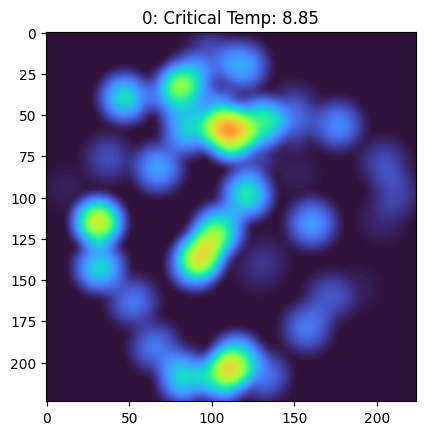

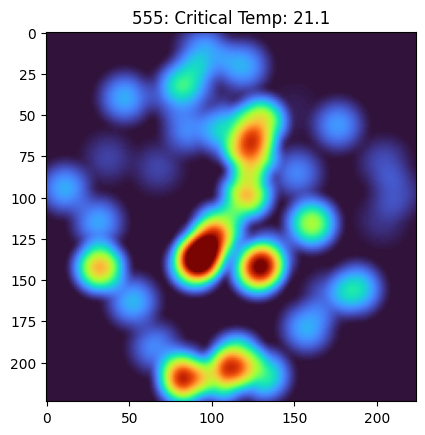

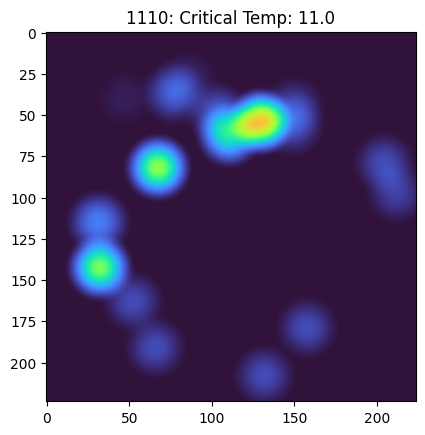

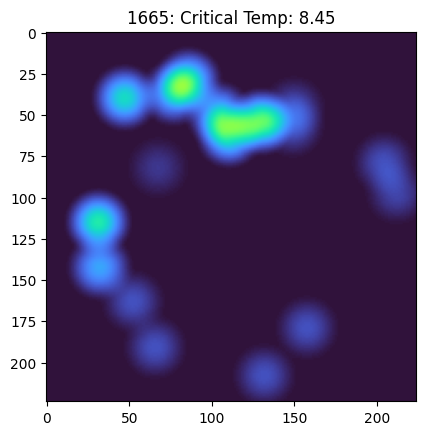

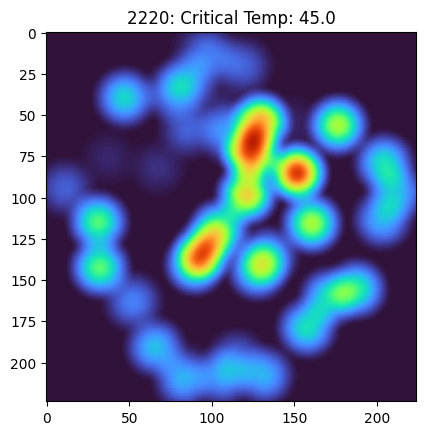

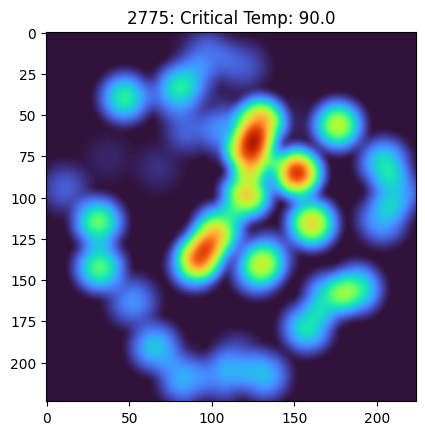

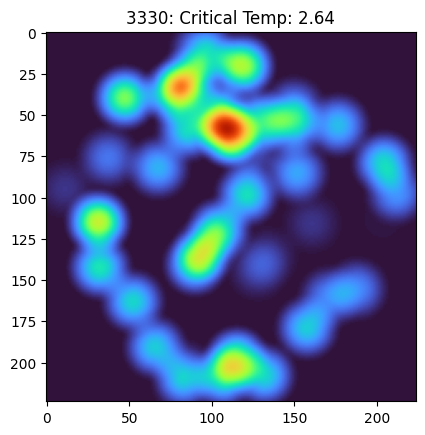

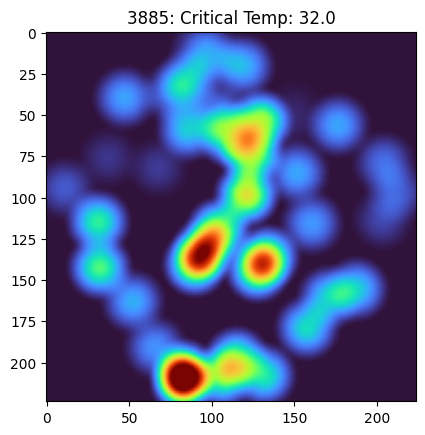

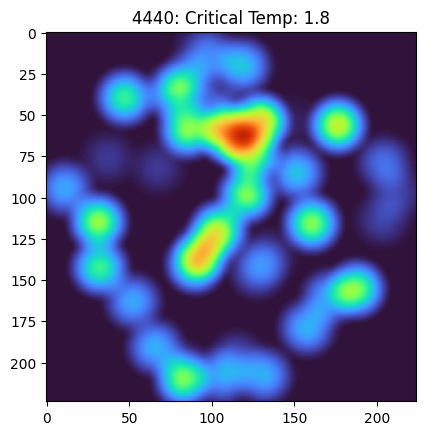

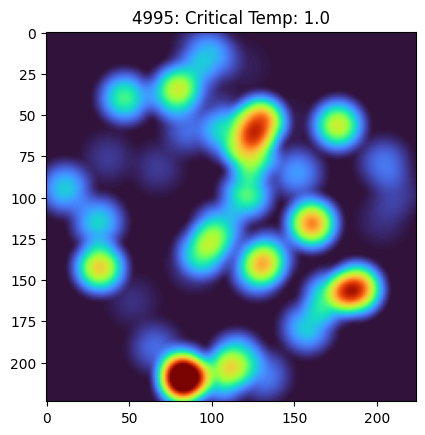

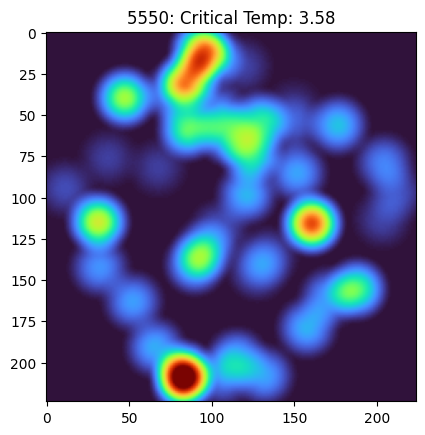

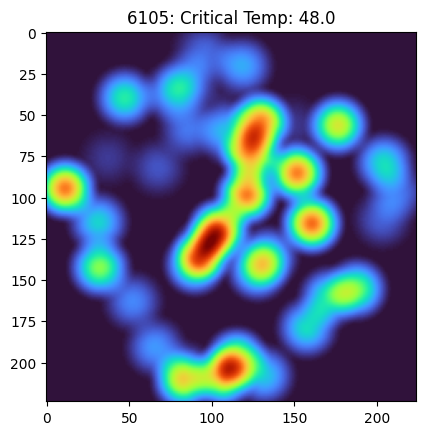

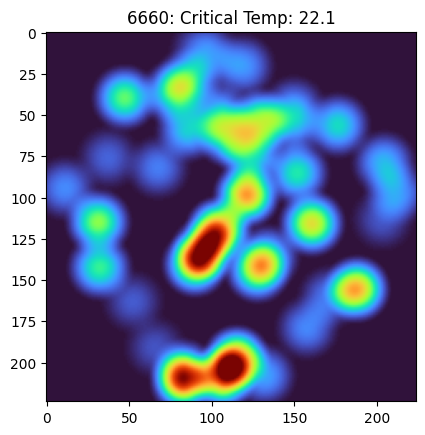

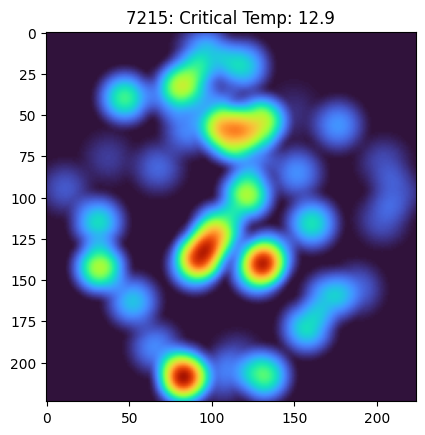

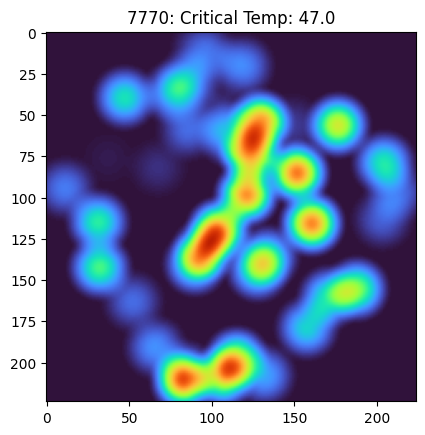

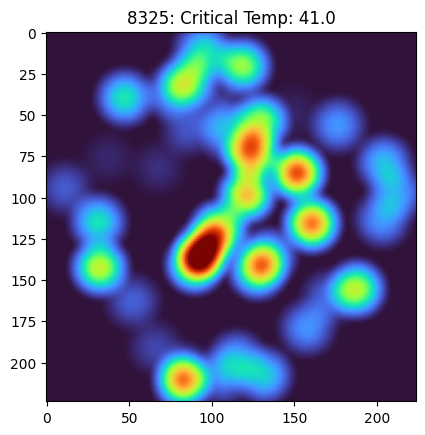

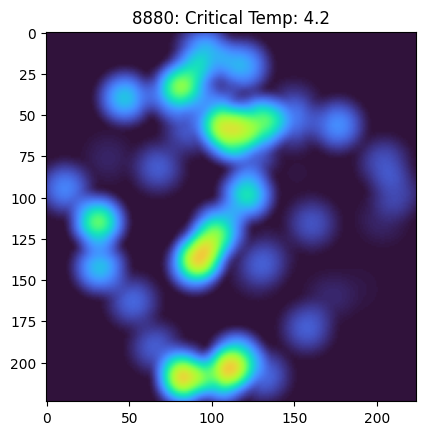

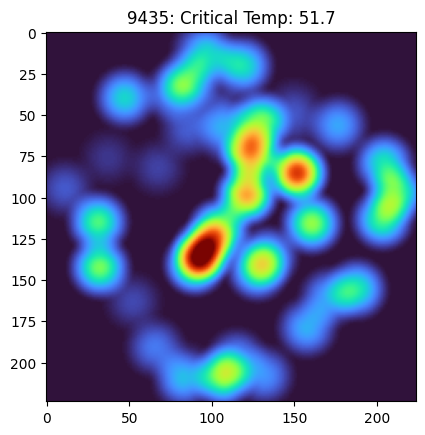

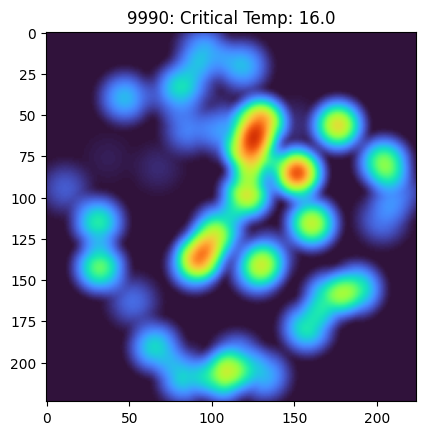

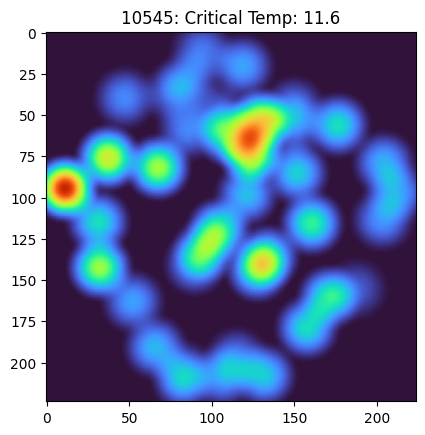

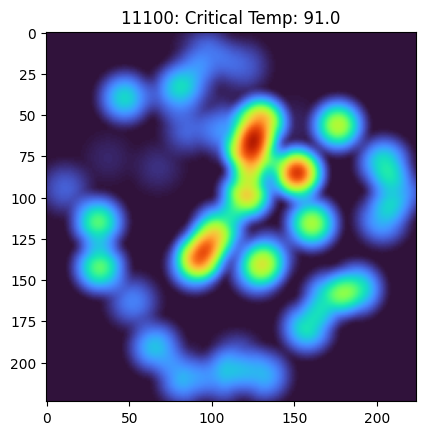

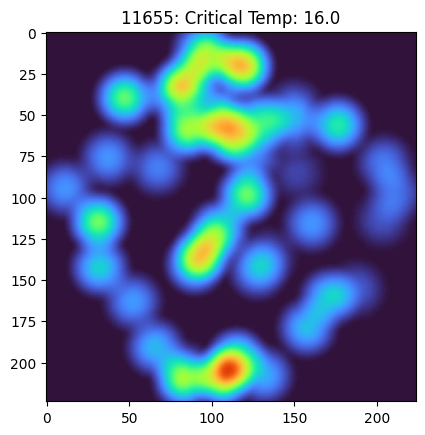

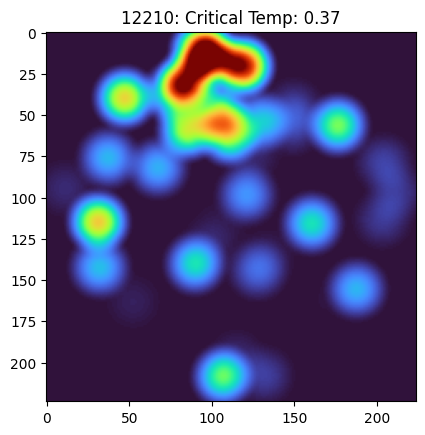

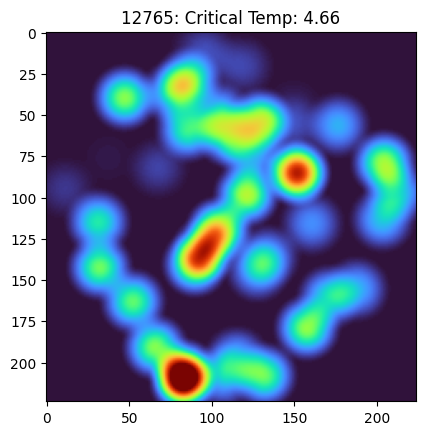

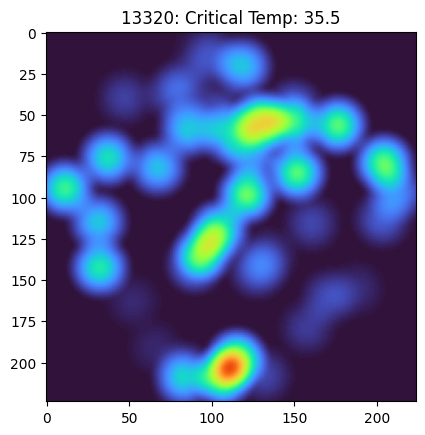

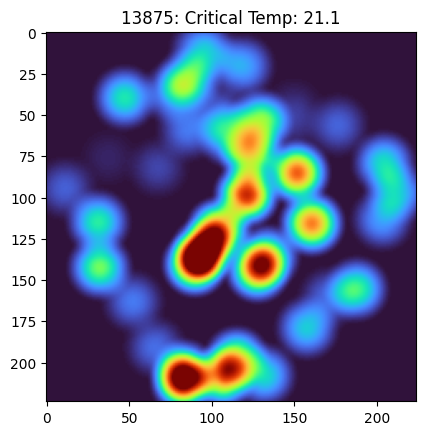

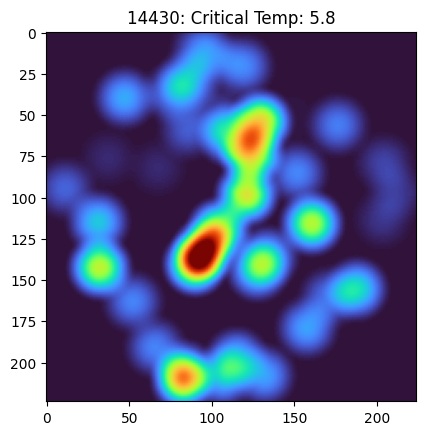

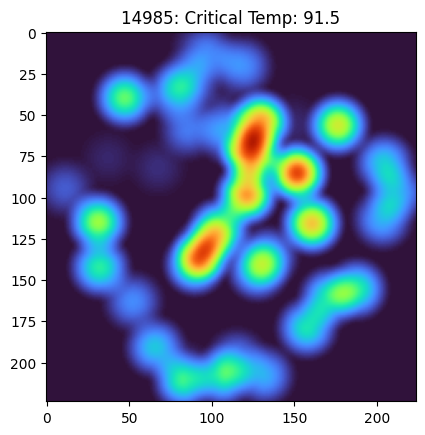

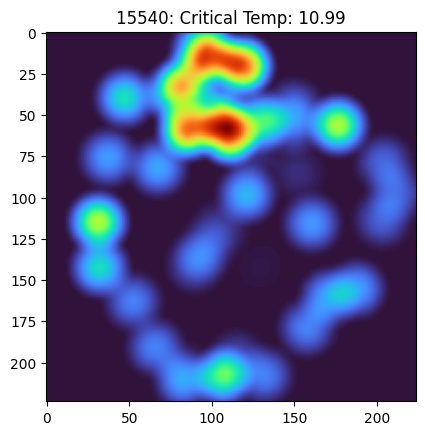

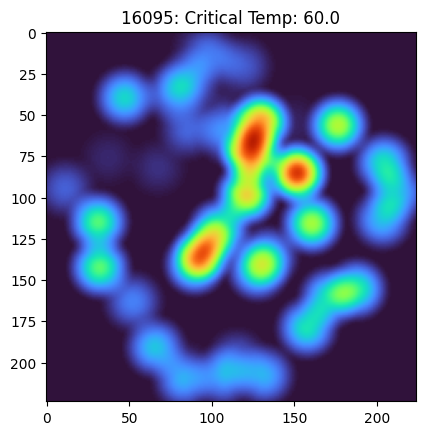

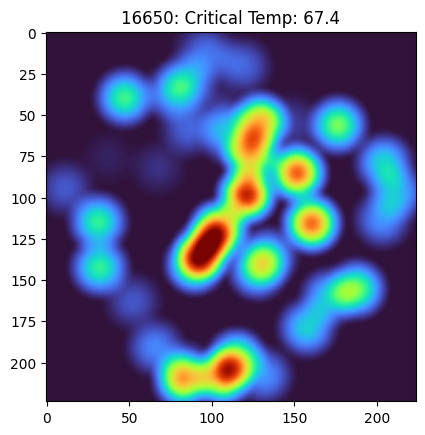

In [176]:
y_train = y_train.reset_index(drop=True)

for i in range(len(X_images)):
    if i % 555 != 0:
        continue
    plt.imshow(X_images[i])
    plt.title(f'{i}: Critical Temp: {y_train[i]}')
    plt.show()



# Test gallery

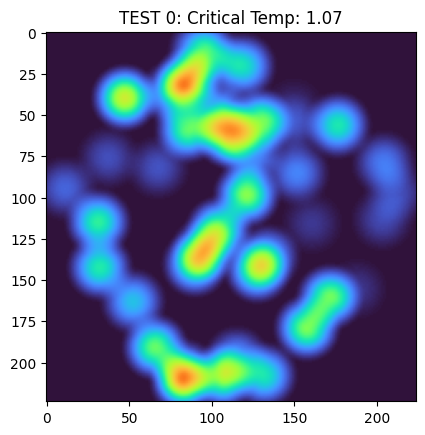

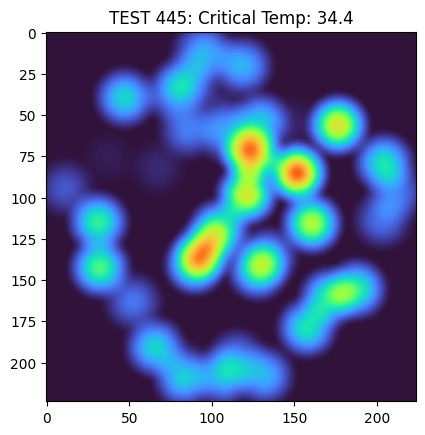

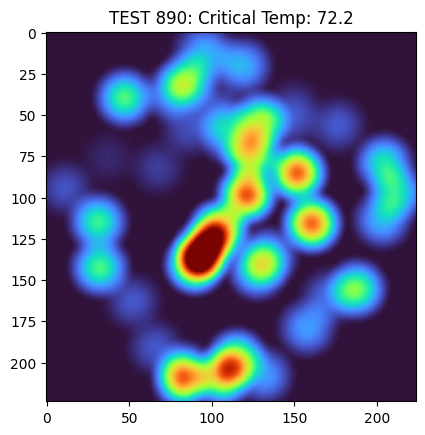

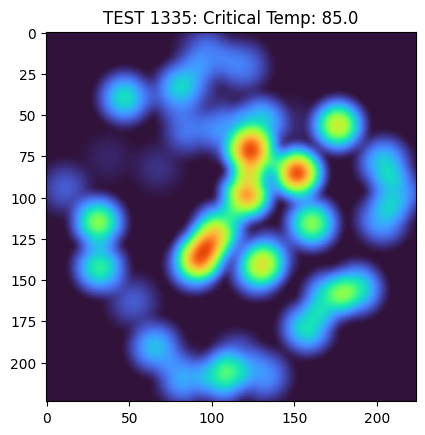

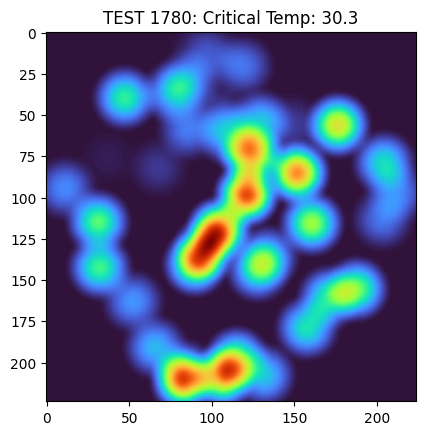

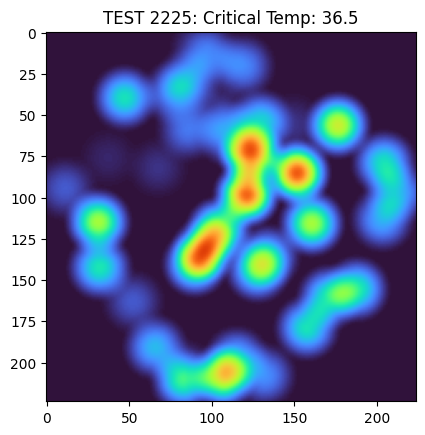

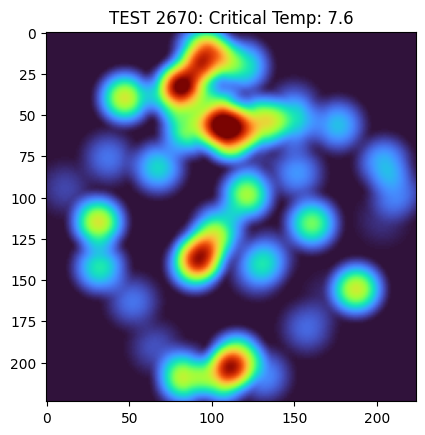

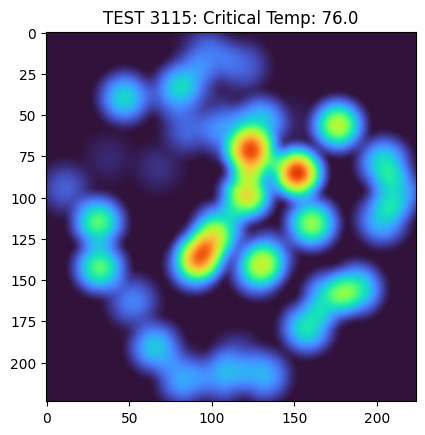

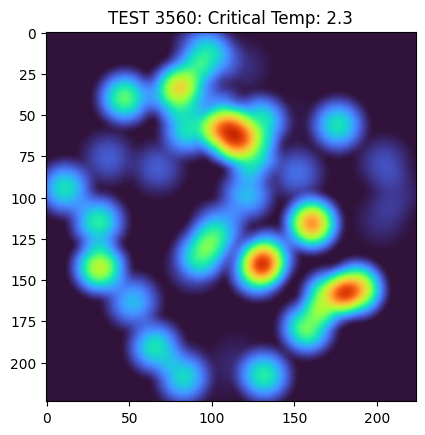

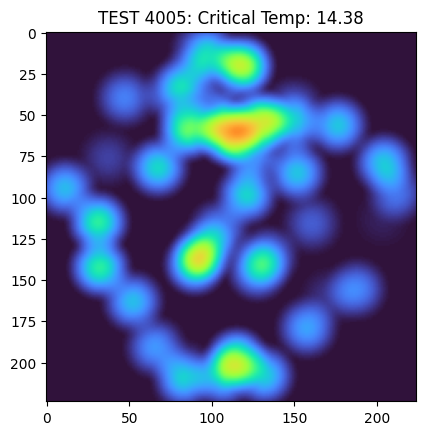

In [199]:
y_test = y_test.reset_index(drop=True)

for i in range(len(X_test_images)):
    if i % 445 != 0:
        continue
    plt.imshow(X_test_images[i])
    plt.title(f'TEST {i}: Critical Temp: {y_test[i]}')
    plt.show()



## Train CNN

In [171]:
# 1. Start Training
history = model.fit(
    X_images,   # Your (N, 224, 224, 3) numpy array
    y_train,   # Your (N,) numpy array of float targets
    epochs=20,
    batch_size=32,
    validation_split=0.2, # Uses 20% of data for live testing
    verbose=1             # Ensures the interactive progress bar shows
)

Epoch 1/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1651s 4s/step - loss: 350.8565 - mean_absolute_error: 12.8877 - val_loss: 1386.8492 - val_mean_absolute_error: 27.7581
Epoch 2/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1626s 4s/step - loss: 274.3856 - mean_absolute_error: 11.2670 - val_loss: 1226.6327 - val_mean_absolute_error: 23.7383
Epoch 3/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1645s 4s/step - loss: 249.4537 - mean_absolute_error: 10.5865 - val_loss: 583.9041 - val_mean_absolute_error: 16.3407
Epoch 4/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1635s 4s/step - loss: 219.9551 - mean_absolute_error: 9.8618 - val_loss: 407.3117 - val_mean_absolute_error: 12.9525
Epoch 5/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1646s 4s/step - loss: 203.2697 - mean_absolute_error: 9.3959 - val_loss: 853.8314 - val_mean_absolute_error: 20.8635
Epoch 6/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1616s 4s/step - loss: 191.9022 - mean_absolute_error: 9.1554 - val_loss: 527.1726 - val_mean_absolute_error: 15.4329
Epoch 7/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 1618s 4s/step

## Fitness curve

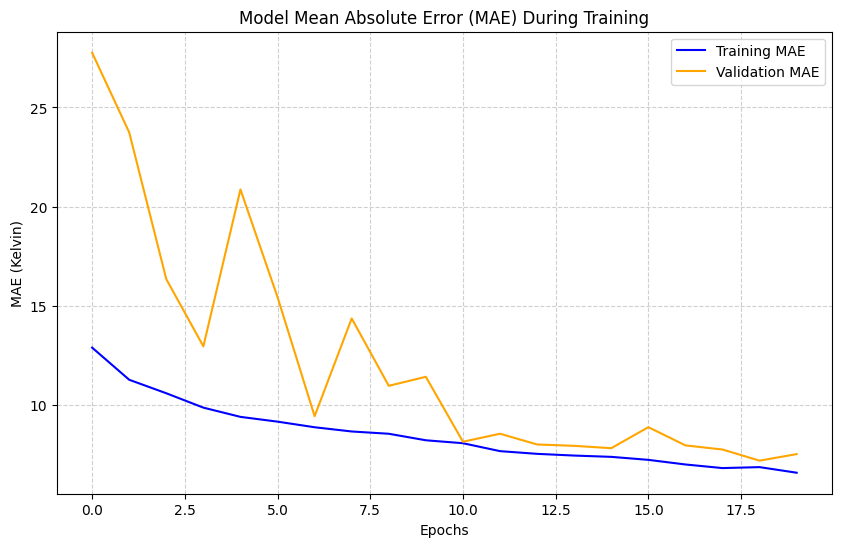

In [178]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_absolute_error'], label='Training MAE', color='blue')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE', color='orange')

# Formatting
plt.title('Model Mean Absolute Error (MAE) During Training')
plt.xlabel('Epochs')
plt.ylabel('MAE (Kelvin)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

## Load / save model

In [172]:
model.save('superconductor_resnet.keras')
#model = load_model('superconductor_resnet.keras')

# Test on unseen data

# Comparison against other algorithms

## Original paper (baseline)
MAE 9.5
https://www.researchgate.net/publication/324077979_A_Data-Driven_Statistical_Model_for_Predicting_the_Critical_Temperature_of_a_Superconductor#:~:text=Abstract,%2Dmean%2Dsquared%2Derror.

## State of the art
MAE = 3.54
https://pubs.acs.org/doi/10.1021/acs.jcim.4c01137

# Test

In [200]:
# Generate predictions
y_pred = model.predict(X_test_images)
y_pred = y_pred.flatten()
y_pred

133/133 ━━━━━━━━━━━━━━━━━━━━ 97s 720ms/step


array([[  2.4640975],
       [118.4308   ],
       [ 78.043236 ],
       ...,
       [  3.0240421],
       [ 57.361782 ],
       [ 17.843292 ]], dtype=float32)

In [206]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test MAE: {mae:.2f} K")
print(f"Test RMSE: {rmse:.2f} K")

Test MAE: 8.75 K
Test RMSE: 13.37 K
